In [21]:
from pac_man.search import hill_climbing
from pac_man.utils import manhattan_distance
from pac_man.pacman_problem_astar import PacManProblem
from pac_man.maze_generator.generator import *

In [19]:
def h(node, goal, maze):
    return manhattan_distance(node, goal)


def solve_hill(maze, draw=False, heuristic=h):
    pacman_problem = PacManProblem(
        maze.start_position, maze.goal_position, maze.maze_map, heuristic=h
    )
    root = hill_climbing(pacman_problem)
    path = root[1]
    
    if draw:
        maze.show_search_path(reached=path)
    return path
    

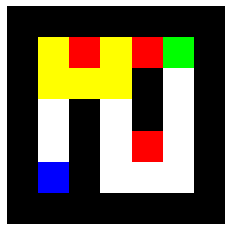

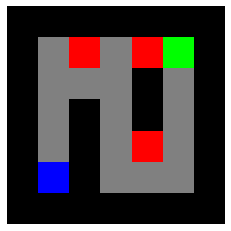

[(5, 1),
 (4, 1),
 (3, 1),
 (2, 1),
 (1, 1),
 (2, 1),
 (2, 2),
 (2, 3),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 3),
 (5, 3),
 (5, 4),
 (5, 5),
 (4, 5),
 (3, 5),
 (2, 5)]

In [58]:
maze = MAZE_simple_coin

MAZE_7x7.show_search_path()
solve_hill(MAZE_7x7, draw=True)

In [76]:
x.all_runs

[1.4882956389919855,
 2.0965833739901427,
 2.886516988015501,
 2.4424980979820248,
 1.3481725929887034,
 1.3512694299861323,
 1.9822959630109835]

4

In [77]:
mazes = [
    MAZE_6x6,
    MAZE_7x7,
    MAZE_8x8,
    MAZE_9x9,
    MAZE_10x10,
    MAZE_11x11,
    MAZE_14x14,
    MAZE_21x21,
    MAZE_42x42,
]

results = {}
for maze in mazes:
    map_len = len(maze.maze_map) ^ 2
    result = %timeit -o -n10 -r10 solve_hill(maze)
    results[map_len] = {
        'avg': result.average,
        'std': result.stdev,
        'runs': result.all_runs
    }

225 µs ± 59.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
481 µs ± 95.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
848 µs ± 285 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
837 µs ± 117 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
1.27 ms ± 335 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
991 µs ± 106 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
2.61 ms ± 466 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
2.2 ms ± 400 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
19.3 ms ± 3.63 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [78]:
results

{4: {'avg': 0.00022531871974933892,
  'std': 5.957284830219977e-05,
  'runs': [0.0033228510001208633,
   0.0019494740117806941,
   0.003047935984795913,
   0.0024519349972251803,
   0.0017619400168769062,
   0.0016228710010182112,
   0.0015935080009512603,
   0.0018124279740732163,
   0.0028493819991126657,
   0.002119546988978982]},
 5: {'avg': 0.00048109283990925176,
  'std': 9.525892873462104e-05,
  'runs': [0.004734930989798158,
   0.004583080997690558,
   0.005628518993034959,
   0.0042684760119300336,
   0.003908467013388872,
   0.005361826013540849,
   0.004999630997190252,
   0.003978536988142878,
   0.0036372019967529923,
   0.007008613989455625]},
 10: {'avg': 0.0008475602199905553,
  'std': 0.0002850665632258499,
  'runs': [0.007115393003914505,
   0.009465203009312972,
   0.007310875982511789,
   0.015931875997921452,
   0.010428915993543342,
   0.00658339200890623,
   0.007986562995938584,
   0.005787325004348531,
   0.005914418987231329,
   0.008232059015426785]},
 11: {'

In [60]:
import seaborn as sns
import pandas as pd

In [72]:
size = list(results.keys())

In [73]:
avg = [data["avg"] for data in results.values()]

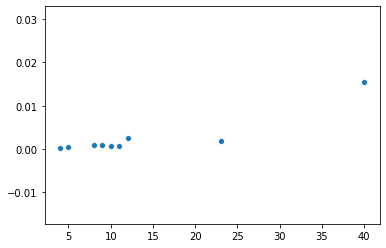

In [86]:
sns.scatterplot(size, avg)

In [80]:
all_runs = [data["runs"] for data in results.values()]

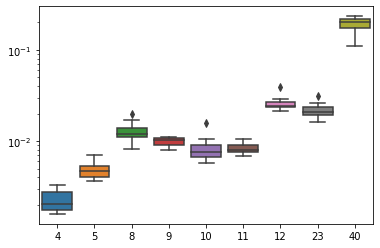

In [91]:
sns.boxplot(x=size, y=all_runs).set_yscale("log")